# Heathvonn Styles

# Final Project Deliverable

## Dataset:

Soccer Player Statistics https://www.kaggle.com/antoinekrajnc/soccer-players-statistics


## Use case:

Soccer Team Recruiter: Use graph data to target best suited players for a club at a specific position in terms of player versatility, work rate and availability


## Benefit:

As a Soccer Team Recruiter, you want to be fully capable of analyzing player viability in a team based setting. This could
mean assuring that a player has a certain rating or that a player practices and performs with a specific work rate.
As a recruiter you may want to find a player who closely resembles a retiring player or player with an expiring 
contract with respect to rating and similar traits. Also, as a recruiter you are looking for the next big star who 
does not possess a high rating at the time of recruiting.

Team player recruiters can use this data model to gain greater insight into player traits, ratings and 
group classifications. This data graph model will help with player recruiting through visualization of data
statistics relevant to age, contract expiries, player ratings and work rate. Additionally, this graph model 
can be used to display commonality of traits amongst players of various rating groups.

This data model can be referred to as a talent pool of players where all players are filtered into rating groups,
non dependent of the positions they play. Having such a data model allows soccer team recruiters to make 
comparisons between players of similar rating groups. These comparisons can include commonality of traits and rankings 
based on which players share the most traits with other players. Trait comparisons can easily be made due to the 
implementation of the :SHARES_TRAIT relationship, which is encoded with the name of the specific trait shared.

## Data Graph Model Questions:


<ul>
  <li>Which club produces the highest value players?</li>
  <li>Who are the youngest high rating players soon to become free agents and what are their positions/ preferred positions?</li>
  <li>Who is the oldest high rating player for a particular club with a contract that will soon expire?</li>
  <li>Who is the oldest high rating player for a particular position with a contract that will soon expire?</li>  
  <li>What is the work rate classification of a particular player with a soon to expire contract on a given team?</li>
  <li>Which players within the same Rating Group are most similar?</li>  
</ul>

* Rating Group is either High (player ratings >= 85 ), Medium(84 >= player ratings >= 61 ) or Low (player ratings <= 60) *


## 1st version / Graph Data Model 

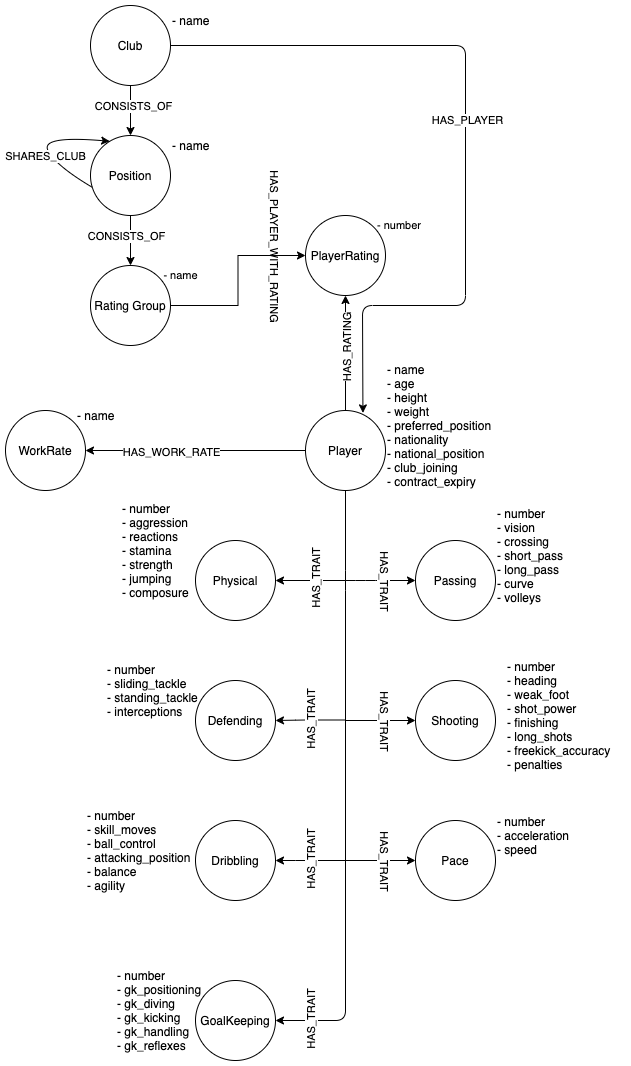

## 2nd version/ Graph Data Model 

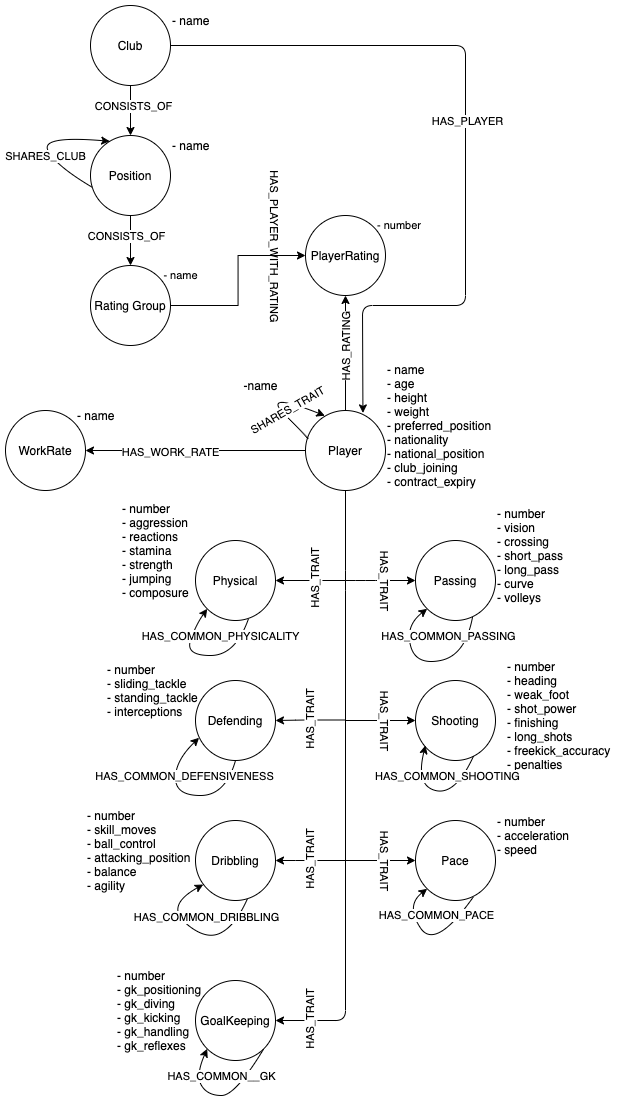

## Updates to Graph Data Model

The properties birth_date and preferred_foot were removed from player node. The property birth_date was removed 
because age was already present as a property of the player node, which meant knowing a player's birth_date was no
longer necessary for calculating a player's age. Also, preferred_foot was removed due to complications with the data
import into neo4j.


The HAS_COMMON_PHYSICALITY, HAS_COMMON_PASSING, HAS_COMMON_DEFENSIVENESS, HAS_COMMON_SHOOTING, HAS_COMMON_DRIBBLING, HAS_COMMON_PACE, and HAS_COMMON_GK monopartite relationships were added to the Graph Data Model. Each player has their individual trait nodes and based on whether players have trait nodes with the same number value, there were relationships created between the trait nodes to reflect the commonality. For example, if two player had a Physical node with number value 78, the Physical nodes from both players would now be connected by HAS_COMMON_PHYSICALITY relationship. By adding this feature to the Graph Data Model, Soccer Team Recruiters can now make player comparisons based on traits shared. Players in the same Rating Group can be compared to see what traits are most common within a specific Rating Group and even to figure out which traits are most unique.

The SHARES_TRAIT monopartite relationship between players was also added to the Graph Data Model. Players who have their trait nodes connected together were then connected to each other by a SHARES_TRAIT relationship, which has a name property that stores the name of the trait that is shared between any two given players.

## Final version/ Graph Data Model 

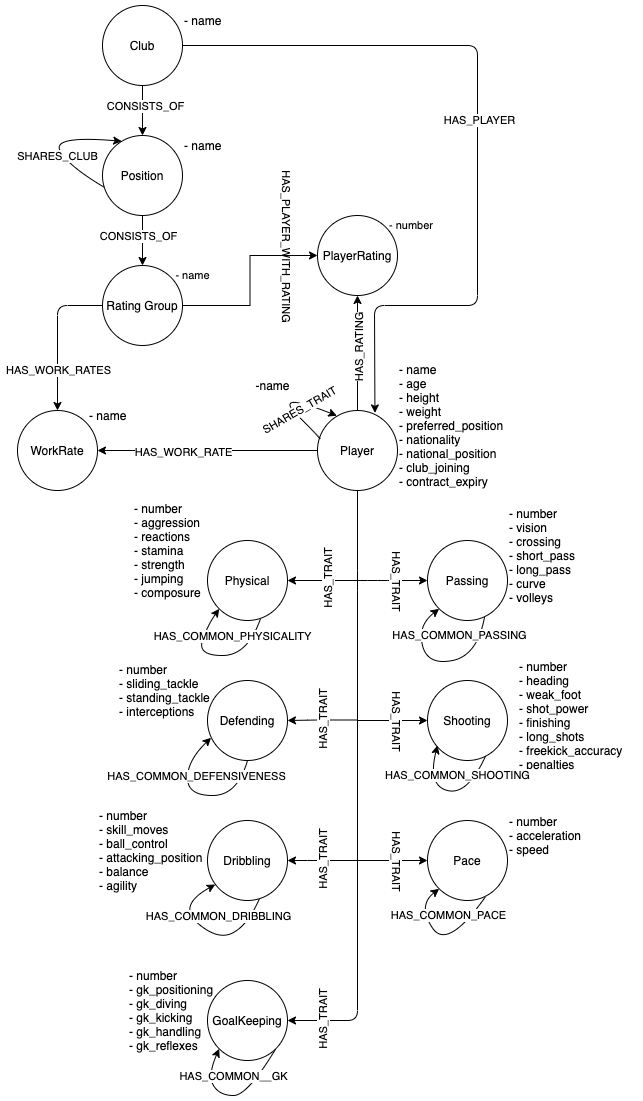

## Updates to Graph Data Model

The HAS_WORK_RATES relationship was added between ther RatingGroup and WorkRate nodes. The value of this relationship, is that it provides insight into which work rates are and are not present within a given rating group. Soccer Team Recruiters can use this feature to quickly analyze which rating group has the players they want to consider for their team, decreasing time wasted on checking every rating group for a player that may not be present.

## Graph Projections

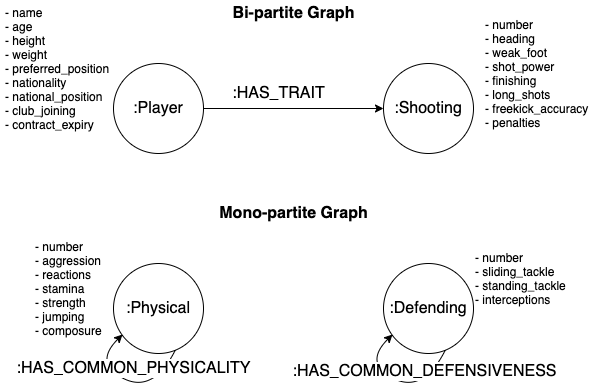

## Populated Neo4J database

<img src="photos/NodeRel.png" style="height:800px;width:500px"/>


<img src="photos/propKeys.png" style="height:900px;width:500px"/>

## Cypher Queries

### Query 1 - Find youngest high value player, expected free agent

MATCH (pr:PlayerRating)<-[:HAS_PLAYER_WITH_RATING]-(rg:RatingGroup) where rg.name = 'High'

MATCH (ply:Player) where toInteger(ply.rating) = pr.name

WITH *

WHERE ply.contract_expiry = "2021.0"

WITH *

WHERE toInteger(ply.age) < 25

Return ply.name AS name,ply.age AS age,ply.rating AS rating,ply.contract_expiry AS contract_expiry, ply.club_position AS club_position, ply.preffered_position AS preffered_position

### Results


In [2]:
import neo4j
import pandas as pd
df = pd.read_csv('results/results1.csv')
df.head()

,name,age,rating,contract_expiry,club_position,preffered_position
0,Jan Oblak,24,87,2021.0,GK,GK
1,Paul Pogba,24,88,2021.0,LCM,CM/CAM
2,Marco Verratti,24,86,2021.0,RCM,CM/CDM
3,David Alaba,24,86,2021.0,LB,LB/CM


###  Query 1 Value-Added

This can be valuable to Soccer Team Recruiters in finding the youngest high value players who are soon to 
become free agents for various positions.

### Query 2 - Find Juventus' players position, name, workRate, contract expiry

MATCH (pos:Position)<-[:CONSISTS_OF]-(c:Club) where c.name = "Juventus"

MATCH (ply:Player)<-[:HAS_PLAYER]-(c)

MATCH (wr:WorkRate)<-[:HAS_WORK_RATE]-(ply)

MATCH (ply) where ply.club_position = pos.name

Return pos.name AS club_position,ply.name AS name,wr.name AS work_rate,toInteger(ply.rating) AS rating,toInteger(ply.contract_expiry) AS contract_expiry

### Results

In [5]:
df2 = pd.read_csv('results/results2.csv')
df2.head(29)

,club_position,name,work_rate,rating,contract_expiry
0,Sub,Daniele Rugani,Low / Medium,80,2021
1,Sub,Dani Alves,High / Low,84,2018
2,Sub,Mario Lemina,Medium / Medium,77,2020
3,Sub,Emil Audero,Medium / Medium,67,2018
4,GK,Gianluigi Buffon,Medium / Medium,88,2018
5,Res,Matheus Pereira,High / Medium,70,2017
6,Res,Matheus Pereira,Medium / Medium,70,2017
7,Sub,Kwadwo Asamoah,High / High,80,2017
8,Res,Moise Kean,Medium / Medium,62,2017
9,LM,Mario Mandžukić,High / High,83,2019


### Query 2 Value-Added

This query can be used by a soccer team recruiter to inspect a team's makeup in terms of position composition. Additionally, 
this data helps with management of expected contract expiries. This information can help with making decisions on whether
a specific player should have their contract renewed based on their work rate and player rating.

### Query 3 - Find high value players at a specific position with contract expiring

MATCH (pr:PlayerRating)<-[:HAS_PLAYER_WITH_RATING]-(rg:RatingGroup) where rg.name = 'High' 

MATCH (ply:Player) where toInteger(ply.rating) = pr.name

WITH *

WHERE ply.contract_expiry = "2021.0"

WITH *

WHERE ply.club_position = "ST"

MATCH (ply)<-[:HAS_PLAYER]-(c:Club)

RETURN ply.name AS name,ply.age AS age,ply.rating AS rating,ply.contract_expiry AS contract_expiry, ply.club_position AS club_position, ply.preffered_position AS preffered_position ,c.name AS club

### Results 

In [6]:
df3 = pd.read_csv('results/results3.csv')
df3.head(3)

,name,age,rating,contract_expiry,club_position,preffered_position,club
0,Robert Lewandowski,28,90,2021.0,ST,ST,FC Bayern
1,Gonzalo Higuaín,29,89,2021.0,ST,ST,Juventus
2,Luis Suárez,30,92,2021.0,ST,ST,FC Barcelona


### Query 3 Value-Added 

The value added here is that a soccer team recruiter can target soon to be free agents based on a specific position. This data also provides insight into which teams the expected free agents are on that will have to be approached.

## Graph Algorithms

### Algorithm 1: PageRank 

#### Node Projection 

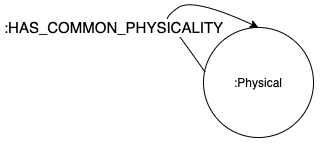

CALL gds.pageRank.stream({
  
  nodeProjection:"Physical", 
  
  relationshipProjection: "HAS_COMMON_PHYSICALITY",
  
  maxIterations: 2,
  
  dampingFactor: 0.85
})

YIELD nodeId, score

RETURN gds.util.asNode(nodeId).number AS Physicality, score

ORDER BY score DESC;

### Results

In [7]:
df4 = pd.read_csv('results/GAresults1.csv')
df4.head(1000)

,Physicality,score
0,66,98.8350
1,63,91.6950
2,67,91.4400
3,59,78.3075
4,55,74.7375
...,...,...
995,54,0.1500
996,56,0.1500
997,43,0.1500
998,48,0.1500


#### Purpose 

As a Soccer Team Recruiter it would be useful to know which Physical trait are most represented in a specific rating group. 
Having such knowledge is beneficial in determining which players are most unique with regards to their Physical trait node.

#### Value-Added

The data provided from running the pageRank algorithm on the node projection specified above is important 
because it gives insight into how common or not a particular physicality rating is between all of the players 
in the "High" RatingGroup. From the data provided above it can be concluded that the most common physicality rating shared by players in the "High" RatingGroup is 66 as it recieved the highest score ranking of "98.8350". 


### Algorithm 2 - Cosine Similarity

#### Node Projection 1

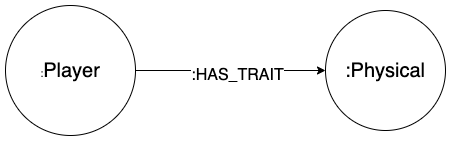

Match (p2:PlayerRating)<-[:HAS_PLAYER_WITH_RATING]-(r:RatingGroup) where r.name = "High"    

Match (pl:Player)-[:HAS_RATING]->(p)

Match (pl2:Player)-[:HAS_RATING]->(p2)

Match (pl)-[h1:HAS_TRAIT]->(trait:Physical)

Match (pl2)-[h2:HAS_TRAIT]->(trait2:Physical)

RETURN pl.name AS player1,
       pl2.name AS player2,
       gds.alpha.similarity.cosine(collect(toInteger(trait.number)), collect(toInteger(trait2.number))) AS similarity

ORDER BY similarity ASC

#### Results 

In [9]:
df9 = pd.read_csv('results/phys.csv')
df9.head(7225)

,player1,player2,similarity
0,Adam Smith,David Silva,0.951842
1,Adam Smith,Marcelo,0.951862
2,Adam Smith,Cesc Fàbregas,0.952424
3,Adam Smith,Luka Modrić,0.952424
4,Adam Smith,Paulo Dybala,0.952424
...,...,...,...
7220,Adrián,Kevin De Bruyne,0.995893
7221,Adrián,Leonardo Bonucci,0.995893
7222,Adrián,Jan Oblak,0.995893
7223,Juan Carlos,Karim Benzema,0.995893


#### Purpose 

The goal when running the Cosine Similarity algorithm on this projection was to compare player1 and player2 to each
other using a single trait. This means that the comparison would use the ":HAS_TRAIT" relationship with specification 
of one trait node in particular.

#### Value-Added 

The Cosine Similarity algorithm adds value here by providing a Soccer Team Recruiter with the ability to find
which players are similar with respect to a particular trait. Knowing this allows Soccer Team Recruiters to execute
searches for the best player replacements or substitutes for retiring players or players with expiring contracts on
a team.

#### Node Projection 2

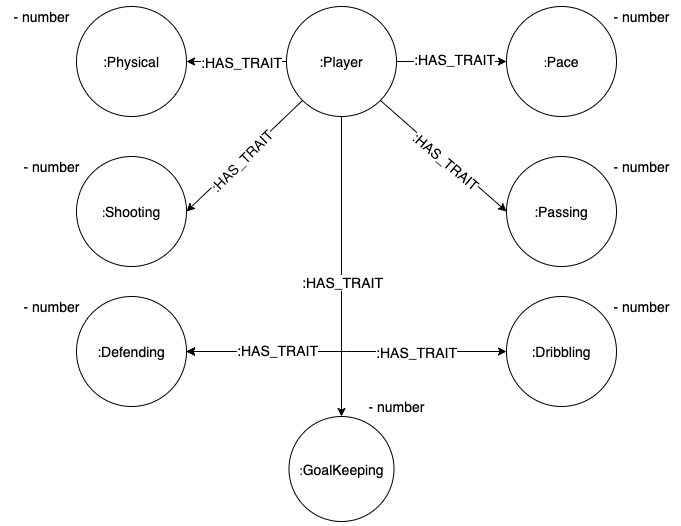

Match (p2:PlayerRating)<-[:HAS_PLAYER_WITH_RATING]-(r:RatingGroup) where r.name = "High"    

Match (pl:Player)-[:HAS_RATING]->(p)

Match (pl2:Player)-[:HAS_RATING]->(p2)

Match (pl)-[h1:HAS_TRAIT]->(trait)

Match (pl2)-[h2:HAS_TRAIT]->(trait2)

RETURN pl.name AS player1,
       pl2.name AS player2,
       gds.alpha.similarity.cosine(collect(toInteger(trait.number)), collect(toInteger(trait2.number))) AS similarity

ORDER BY similarity ASC

#### Results 

In [13]:
df5 = pd.read_csv('results/ga2.csv')
df5.head(7225)

,player1,player2,similarity
0,Samir Handanovič,Samir Handanovič,0.712590
1,Jan Oblak,Samir Handanovič,0.717097
2,Samir Handanovič,Jan Oblak,0.717097
3,Stéphane Ruffier,Samir Handanovič,0.719256
4,Samir Handanovič,Stéphane Ruffier,0.719256
...,...,...,...
7220,Radja Nainggolan,Luis Suárez,0.901022
7221,Luis Suárez,Radja Nainggolan,0.901022
7222,Luka Modrić,Luis Suárez,0.902910
7223,Luis Suárez,Luka Modrić,0.902910


#### Purpose 

The goal when running the cosine similarity algorithm on this projection was to compare player1 and player2 to each other as whole player and not as a 
single trait. This means that the comparison would use the ":HAS_TRAIT" relationship with no specification of a trait 
node, in order to compare all trait nodes of player1 to all trait nodes of player2. For example, player1's pace node 
number value would be compared to player2's pace node number value and then their shooting node number values would be
compared until all traits have been checked.


#### Value-Added 

The Cosine Similarity graph algorithm brings value to the specified node projection by 
showing the overall similarity between players. This similarity score is based upon player1 and 
player2 and how common their traits are with each other. The higher the similarity score is the closer the traits are between player1 and player2, with respect to the ":HAS_TRAIT" connections they have. In the projection used, the ":HAS_TRAIT" relationship connects the following trait nodes: Physical, Pace, Shooting, Passing, Defending, Dribbling
GoalKeeping, to the Player node.

A soccer team recruiter may use this data to suggest possible substitutes for players on various
teams using the commonality of traits between players.

#### Problem

When running the cosine similarity algorithm, a problem is seen where when the same player is compared to themselves
there is a similarity of 0.917517 when the similarity should be 1.0 . This can signify that either the cosine similarity  algorithm did not execute as expected on the projection or that the player duplicates created when importing the graph data into neo4j did not have the same trait nodes.

### Algorithm 3 - Degree Centrality 

#### Node Projection 

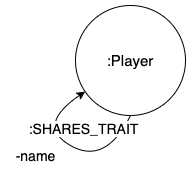

CALL gds.degree.stream({

nodeProjection: 'Player',

relationshipProjection: 'SHARES_TRAIT' })

YIELD nodeId, score

RETURN gds.util.asNode(nodeId).name AS name, score AS shared_with

ORDER BY shared_with DESC

#### Results

In [10]:
df6 = pd.read_csv('results/ga3.csv')
df6.drop_duplicates(subset ="name", keep = 'first', inplace = True)
df6.head(200)

,name,shared_with
0,Marcelo,258.0
3,Felipe,234.0
9,Danilo,210.0
14,Gabriel,150.0
19,Ben Davies,108.0
...,...,...
379,Ahmet Çalık,18.0
380,Anouar Kali,18.0
381,Castro,18.0
382,Isaac Cofie,18.0


#### Purpose 

As a Soccer Team Recruiter it would be useful to know which players share the most traits with other players. The 
benefit of this knowledge is really based upon which rating group is being analyzed. 

#### Value-Added 

The degree centrality algorithm brings value to this data by displaying the amount of relationships 
a player has in terms of who all they share traits with. This data can point out which players have unique traits,
as well as which players have a combination of traits shared by many other players within the league.

If there are players in the "High" rating group with a large shared_with number, this could mean that because this player shares traits with many players they are more versatile and unique. On the other hand, if there are players in the "Low" rating group with a large shared_with number, this could mean that because this player shares traits with many players they are less unique, because that players traits would be common amongst the low rating players.

#### Problems

When running the Degree Centrality Algorithm an issue of duplicated players affected the results provided above. The 
duplication of players came as a result of the data import and resulted in players having a higher "shared_with" 
number than they actually should. This is because with players being duplicated, there were SHARE_TRAIT relationships 
created between player duplicates.

## Cypher Actions 

### Cypher Action 1 

#### Search Phrase


Find player at Position position_name in RatingGroup rating_group with WorkRate work_rate

Properties: position_name, rating_group, work_rate

#### Description

Find player at  position in  rating group with given work rate

#### Cypher Query


Match (r:RatingGroup{name:$rating_group})-[h:HAS_PLAYER_WITH_RATING]->(pr:PlayerRating)

Match (ply:Player{club_position:$position_name}) where toInteger(ply.rating)=pr.name

Match (ply)-[h2:HAS_RATING]->(pr) 

Match (ply)-[w:HAS_WORK_RATE]->(wr:WorkRate{name:$work_rate})

Return r,h,pr,h2,ply,w,wr

### Cypher Action 2 

#### Search Phrase


Find players who share trait trait_name with player player_name

Properties: trait_name, player_name

#### Description

Find players who share a specified trait in the High Rating group

#### Cypher Query


Match (ply:Player{name:$player_name})-[h:SHARES_TRAIT{name:$trait_name}]->(ply2:Player) 

With *

Match (r:RatingGroup{name:"High"})-[h2:HAS_PLAYER_WITH_RATING]->(pr:PlayerRating) where toInteger(ply.rating)=pr.name

Match (r:RatingGroup{name:"High"})-[h3:HAS_PLAYER_WITH_RATING]->(pr2:PlayerRating) where toInteger(ply2.rating)=pr2.name

Merge (pr)<-[h4:HAS_RATING]-(ply)

Merge (pr2)<-[h5:HAS_RATING]-(ply2)

Return ply,h,ply2,r,h2,pr,pr2,h3,h4,h5

## Graph Visualizations

### Graph Visualization 1

<img src="photos/graphVisual2.png" style="height:800px;width:800px"/>

### Value-Added 

This is a graph visualization of players in the Low rating group with a High/Medium work rate. This is valuable to 
soccer team recruiters in finding low ranked players who have higher potential of improving various traits due to a 
Higher work rate than other players in their ratiing group.

### Graph Visualization 2 

<img src="photos/graphVisual3.png" style="height:800px;width:940px"/>

### Value-Added 

The above graph visualization shows players with expiring contracts, along with players who share the same rating and 
a trait with them. Each :SHARES_TRAIT connection is encoded with the particular trait that is shared. Additionally the
clubs for which each player belongs is also reflected in the graph visualization. The value in this visualization is 
that soccer team recruiters can use this to find the best substitutes for a player, if they want the substitute to be
of the same rating and also share a particular trait of value to the team. By including the the clubs each player belongs to, team recruiters know which teams to communicate with to recruit a player of interest.


### Graph Visualization 3


<img src="photos/graphVisual4.png" style="height:650px;width:830px"/>

### Value-Added 

This graph visualization is valuable because it reflects which work rates are and are not present in each rating
group. Soccer team recruiters can use this to more accurately locate players of interest based on their work rate classifications.

## Overall Value-Added

As a Soccer Team Recruiter the initial problem was having a well organized approach to locating players based on what team they are on, what position they play, their work rate, rating group, age, etc. The Use Case for this Graph Data Model targets that exact issue in a way that makes players more accessible outside of a club or position relationship.
The Graph Data Model developed is centered around having well organized data that allows for easier comparisons within groups of similarly rated players.

A Soccer Team Recruiter using this graph data model now has easier access and greater control over locating the best 
suited player for a team. Recruiters can use a variety of methods to find the players needed such as, Rating Groups, 
Work Rates, Traits, :SHARED_TRAITS etc. Having more than one method for finding a player is useful, because Soccer 
Team Recruiters can combine criteria to lock into the best player that can bring the most value to a team or who can be the best replacement for another player.

For this Graph Data Model, Rating Groups which prior to the data import did not exist were created. As a Soccer Team Recuiter there would exist personal specifications for what ratings are considered to be High, Medium, or Low. In the 
case of this Graph Data Model the "High" rating players were those with those with ratings greater than or equal to 85, the "Medium" rating players those less than or equal to 84 and greater than or equal to 61, and the "Low" rating players those less than 61. The value of this feature is that players are now easily accessible based upon their player Rating Groups, instead of being placed together in a big group. Also, players within the same Rating Groups can be compared using trait nodes, to identify which traits make a player distinguishable from another player and which traits are common amongst certain Rating Groups.

The queries ran on this Graph Data Model, provide insight on how such data can be used to manage team recruiting and 
player contract expiries. These queries also show how Soccer Team Recruiters can best find a player for a specific position or players within a certain age range with a particular rating. The benefit here is that recruiters can build 
a team that has the necessary traits or characteristics for success.



The algorithms used on this Graph Data Model allowed for further exploration into the statistical side of the soccer 
data. Soccer recruiters can use these algorithms to help identify which players are standout performs with unique 
traits or standout players who share many traits with other players. Knowing this can reveal hidden knowledge of who
could be future stars in the league or who should be considered for a potential team roster spot.